# Exploratory Analysis of NN

In [41]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file produced from the network. 

Note: This the file should contain two the training & validation scores for each of the models (i.e. regular and slow).

In [32]:
df = pd.read_csv("accuracy_metrics")

Cleaning the dataframe for readability and graphability.

In [33]:
df = df.drop(['Unnamed: 0', '0', '3'], axis=1).drop([0])

In [34]:
df = df.rename({'1':"Slow Training",'2': "Slow Validation", '4':"Reg. Train", '5':"Reg. Validation"}, axis=1)

Graphing the plot

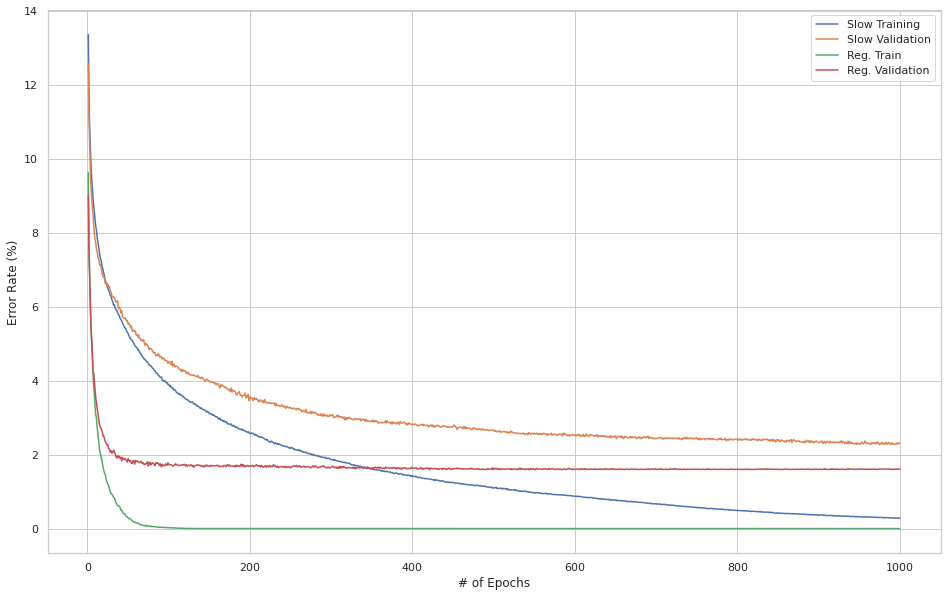

In [43]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
sns.lineplot(data=df, dashes=False);

plt.xlabel("# of Epochs");
plt.ylabel("Error Rate (%)");